In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial Data Preview

The first five rows of the Titanic dataset show key passenger information including:
- PassengerId, Survived (0 = No, 1 = Yes), Pclass (ticket class), Name, Sex, Age, SibSp (siblings/spouses aboard), Parch (parents/children aboard), Ticket, Fare, Cabin, and Embarked (port of embarkation).
- Example: Passenger 1 (Braund, Mr. Owen Harris) is a 22-year-old male in 3rd class who did not survive.
- There are missing values present in the "Cabin" column, shown as NaN.

This initial preview helps confirm that the dataset has loaded correctly and allows an understanding of the data structure and essential features available for further exploratory analysis.

In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Structure and Summary Statistics

- The Titanic dataset contains 891 rows and 12 columns. Each row represents a unique passenger.
- Columns include passenger information (Name, Sex, Age, etc.), ticket details, and whether the passenger survived.
- Data types are appropriate for each column: numerical fields (like Age, Fare) are floats/integers, while names and tickets are objects (strings).
- **Missing values:** The "Cabin" column has many missing entries, and "Age" contains some missing values as well. These will need to be handled in further analysis.
- The statistical summary shows a wide range in age (minimum 0.42, maximum 80) and fare (minimum 0, maximum over 500).

This step confirms the integrity of the data and highlights columns requiring cleaning or imputation before deeper EDA.

In [6]:
df['Survived'].value_counts()
df['Pclass'].value_counts()
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### Categorical Data Frequency

- **Survived:** This column indicates whether each passenger survived (1) or not (0). The distribution will help understand survival rates.
- **Pclass:** Passenger class, a proxy for socio-economic status, split into three levels (1st, 2nd, 3rd class). The count shows how many passengers were in each class.
- **Sex:** The distribution of passengers by gender, showing the number of males and females aboard.

These counts give a quick summary of the categorical variables' distribution and are useful for comparing survival with respect to class and gender in the next analysis steps.

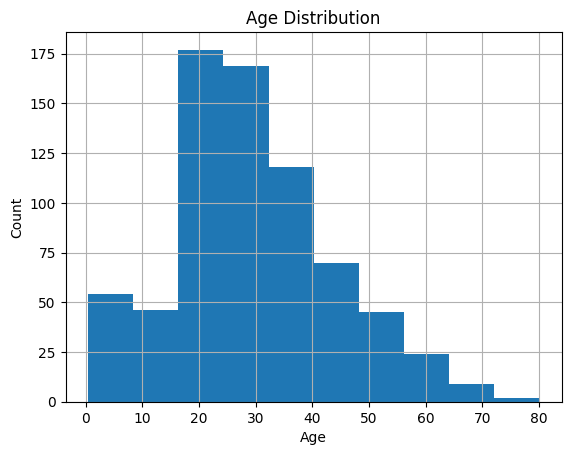

In [7]:
df['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Age Distribution Analysis

The histogram above displays the distribution of passengers’ ages on the Titanic.  
- Most passengers were between 20 and 40 years old, with a noticeable peak around the mid-to-late 20s.
- There are fewer very young children and elderly passengers.
- The distribution is slightly right-skewed, indicating more younger passengers than older ones.
- These age patterns may affect survival analysis and highlight the importance of age in subsequent steps.

Understanding the age structure of the dataset is crucial for grouping, outlier detection, and further relationship analysis with other key features such as survival or class.

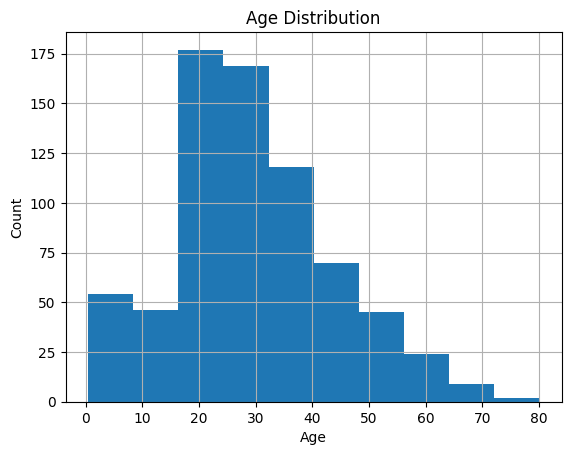

In [8]:
df['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Age Distribution Insights

The histogram visualizes the spread of passenger ages in the Titanic dataset.
- Most passengers are concentrated in the 20–40 year age group.
- There are fewer very young children and elderly passengers.
- The distribution is slightly skewed toward younger ages, with a peak in young adults.
- These age demographics are important for further survival analysis and may influence outcome trends.

This initial look at age provides context for grouping and analyzing survival based on age cohorts in future steps.

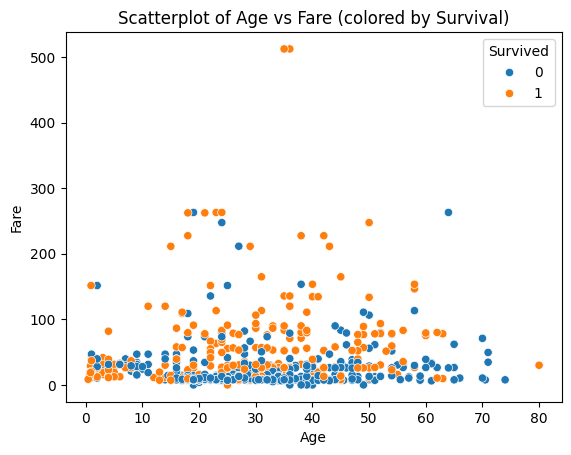

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot of Age vs Fare, colored by Survival
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')

plt.title('Scatterplot of Age vs Fare (colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### Age vs Fare Scatterplot (Colored by Survival)

This scatterplot visualizes the relationship between passenger age and ticket fare, with points colored by survival status:
- Each point represents an individual passenger, plotted by age and fare paid.
- The color differentiation allows quick comparison between survivors and non-survivors.
- Clusters may reveal interesting trends, such as higher fares typically paid by older passengers and/or those with greater likelihood of survival.
- Most fares are relatively low, but outliers exist; further investigation into those high-fare passengers could uncover connections to class, cabin, or other factors.

This plot helps identify how the variables age and fare jointly relate to survival outcomes and can guide deeper analysis for feature importance.

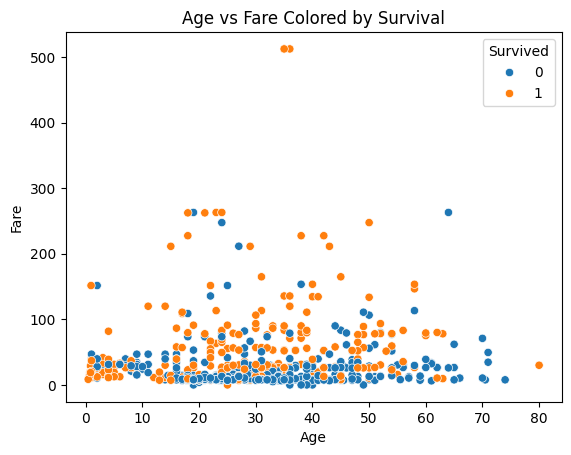

In [12]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### Interpretation: Age vs Fare Colored by Survival

This scatterplot illustrates the relationship between passenger age and the fare paid, with points colored by survival status (1 = Survived, 0 = Did not survive).
- Most passengers paid low fares, with relatively few individuals paying exceptionally high fares (notably above 500).
- Passengers span a wide range of ages, but high fares appear to be paid mainly by middle-aged and older travelers.
- Coloring by the 'Survived' column helps reveal that survival may be more frequent among those paying higher fares and potentially